# Fashion Image Classifier

Image classification on the Fashion MNIST dataset using a convolutional neural network, with VGG16 serving as the convolutional base.

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
from keras import models
import random
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

__Import fashion_mnist dataset__

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

__Convolutional base__

In [4]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

__Convolutional base trainable__

In [6]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block3_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

__Data preparation__

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

train_images = tf.concat([train_images, train_images, train_images], axis=-1)
test_images = tf.concat([test_images, test_images, test_images], axis=-1)

train_images = train_images / 255.0
test_images = test_images / 255.0

__Model creation and training__

In [23]:
model_VGG16 = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'), #256
    layers.Dropout(0.2),
    layers.Dense(10)
  ])

model_VGG16.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005), # learning_rate=0.000005
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [24]:
history_VGG16 = model_VGG16.fit(train_images, train_labels, batch_size=512, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - loss: 1.1625 - sparse_categorical_accuracy: 0.6512 - val_loss: 0.2656 - val_sparse_categorical_accuracy: 0.9068
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - loss: 0.2529 - sparse_categorical_accuracy: 0.9136 - val_loss: 0.2525 - val_sparse_categorical_accuracy: 0.9110
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - loss: 0.2184 - sparse_categorical_accuracy: 0.9238 - val_loss: 0.2353 - val_sparse_categorical_accuracy: 0.9178
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - loss: 0.1973 - sparse_categorical_accuracy: 0.9336 - val_loss: 0.2344 - val_sparse_categorical_accuracy: 0.9198
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - loss: 0.1852 - sparse_categorical_accuracy: 0.9360 - val_loss: 0.2278 - val_sparse_categorical_accuracy: 0.9232
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - loss: 0.1810 - sparse_categorical_accuracy: 0.9372 - val_loss: 0.2312 - val_sparse_categorical_acc

__History visualization__

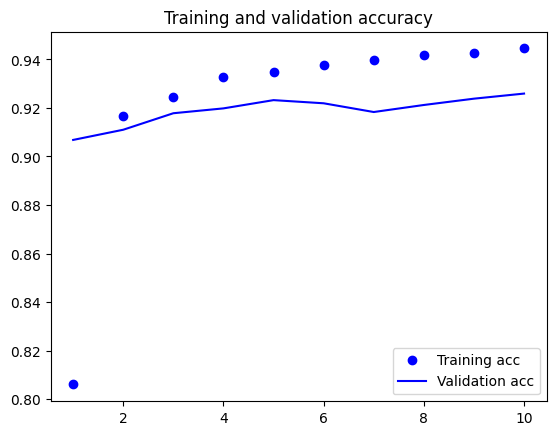

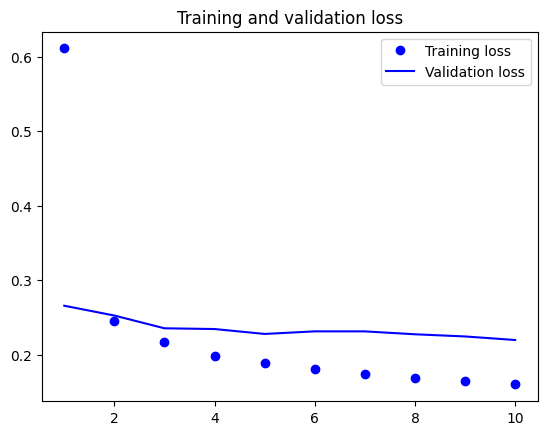

In [25]:
acc = history_VGG16.history["sparse_categorical_accuracy"]
val_acc = history_VGG16.history["val_sparse_categorical_accuracy"]

loss = history_VGG16.history["loss"]
val_loss = history_VGG16.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

__Model accuracy__

In [26]:
results = model_VGG16.evaluate(test_images, test_labels)
print(results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2249 - sparse_categorical_accuracy: 0.9232
[0.21964555978775024, 0.9258999824523926]


__Classification_report__

In [27]:
predictions = model_VGG16.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_pred = np.array([class_names[i] for i in test_labels])
y_true = np.array([class_names[i] for i in predicted_classes])

report = classification_report(y_pred, y_true)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

  Ankle boot       0.98      0.97      0.98      1000
         Bag       0.98      0.99      0.99      1000
        Coat       0.86      0.88      0.87      1000
       Dress       0.90      0.94      0.92      1000
    Pullover       0.88      0.88      0.88      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.82      0.75      0.78      1000
     Sneaker       0.97      0.98      0.97      1000
 T-shirt/top       0.88      0.89      0.88      1000
     Trouser       1.00      0.98      0.99      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



## Conclusions

The model demonstrates the highest recognition accuracy for:

- *Ankle boot* (98%)
- *Bag* (99%)
- *Sandal* (99%)
- *Sneaker* (97%)
- *Trouser* (99%)

However, its lowest recognition accuracy is observed for *Shirt* (78%).
